This notebook introduces the Zindi competition **Women in Big Data South Africa - Women-Headed Households in South Africa**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [3]:
var_desc = pd.read_csv('variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [4]:
df.info() #checking for missing values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

## EDA 

The target variable of interest is the percentage of households per ward that are both female-headed and earn an annual income that is below R19,600 (approximately $2,300 USD in 2011). For context, the poverty line in South Africa is defined as R1,183 per month per person and the average individual salary in South Africa is R20,860 per month

Text(0.5, 0, 'percentage of households per ward that are both female-headed and earn an annual income that is below R19,600')

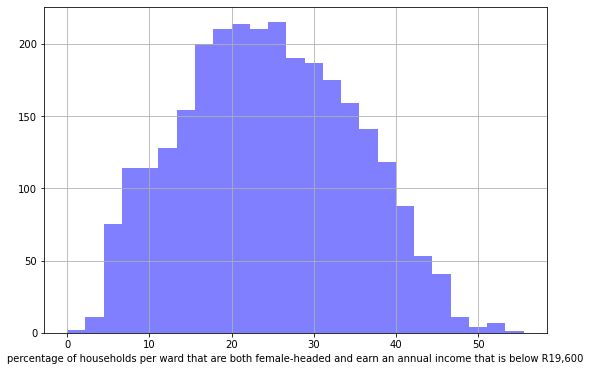

In [5]:
plt.figure(figsize=(9, 6))
x = df['target']
plt.hist(x, 25, facecolor='b', alpha=0.5)
plt.grid(True)
plt.xlabel('percentage of households per ward that are both female-headed and earn an annual income that is below R19,600')

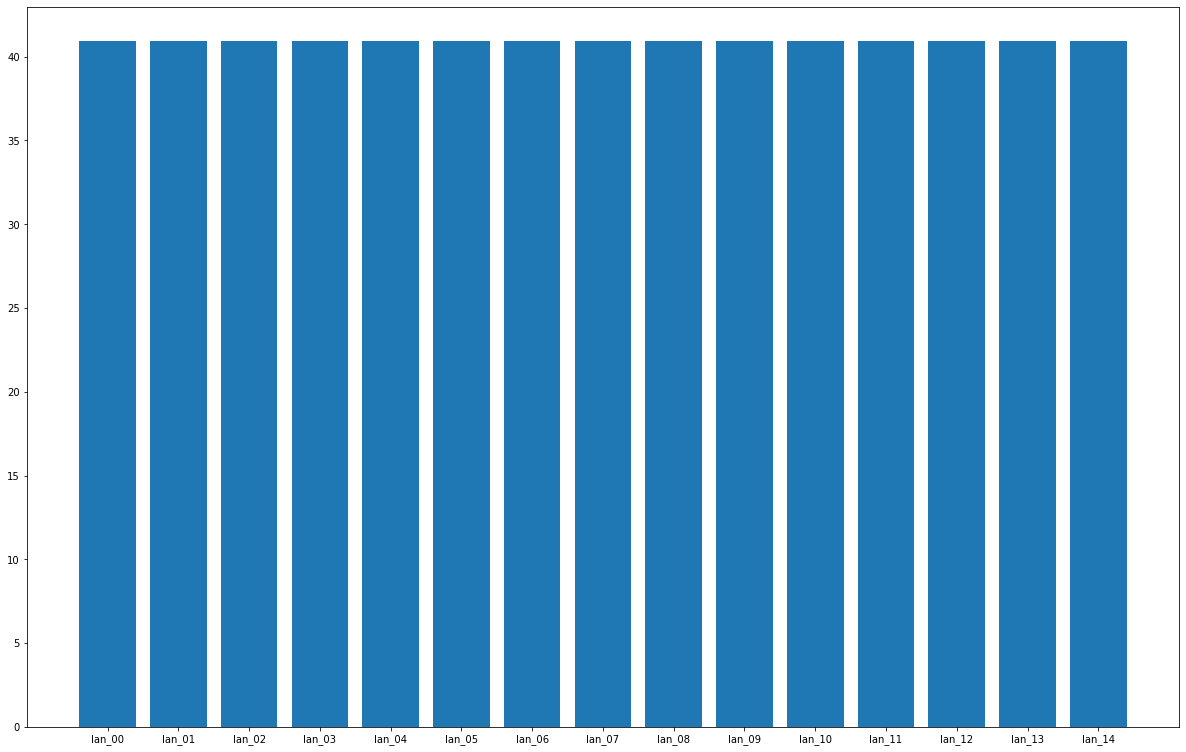

In [6]:
#a bar chart showing distribution in respect to languages.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04','lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09',
        'lan_10', 'lan_11', 'lan_12', 'lan_13', 'lan_14']
for lan in langs:
    sum_total = df[lan].sum()
ax.bar(langs,sum_total)
plt.show()

In [7]:

langs = ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04','lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09',
        'lan_10', 'lan_11', 'lan_12', 'lan_13', 'lan_14']
for lan in langs:
    sum_tota = round(df[lan].sum() / len(df),4)
    print(sum_tota)
    

0.0976
0.0587
0.0294
0.04
0.2843
0.1168
0.1081
0.1307
0.0046
0.0243
0.0243
0.054
0.0128
0.0
0.0145


In [8]:
sum_total = df['lan_00'].sum()
sum_total/(len(df))

0.09760266911998583

In [9]:
#checking of features with correlation with the target value
#features(10) with highest -ve correlation
ve_corr = df.corr()['target'].sort_values(ascending=True).head(10)

In [10]:
#checking of features with correlation with the target value
#features(10) with highest +ve correlation
po_corr = df.corr()['target'].sort_values(ascending = False).head(10)

In [11]:
total_corr = pd.concat([po_corr,ve_corr])
total_corr

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

In [12]:
round_corr = round(abs(total_corr), 2).sort_values(ascending = False)
round_corr

target    1.00
psa_00    0.78
pw_00     0.75
psa_01    0.71
car_01    0.70
car_00    0.70
stv_00    0.66
stv_01    0.66
lln_01    0.64
lln_00    0.64
pg_00     0.61
pg_03     0.58
NL        0.51
lan_00    0.51
pw_06     0.47
dw_01     0.46
pw_02     0.44
pw_03     0.44
lan_01    0.44
dw_04     0.39
Name: target, dtype: float64

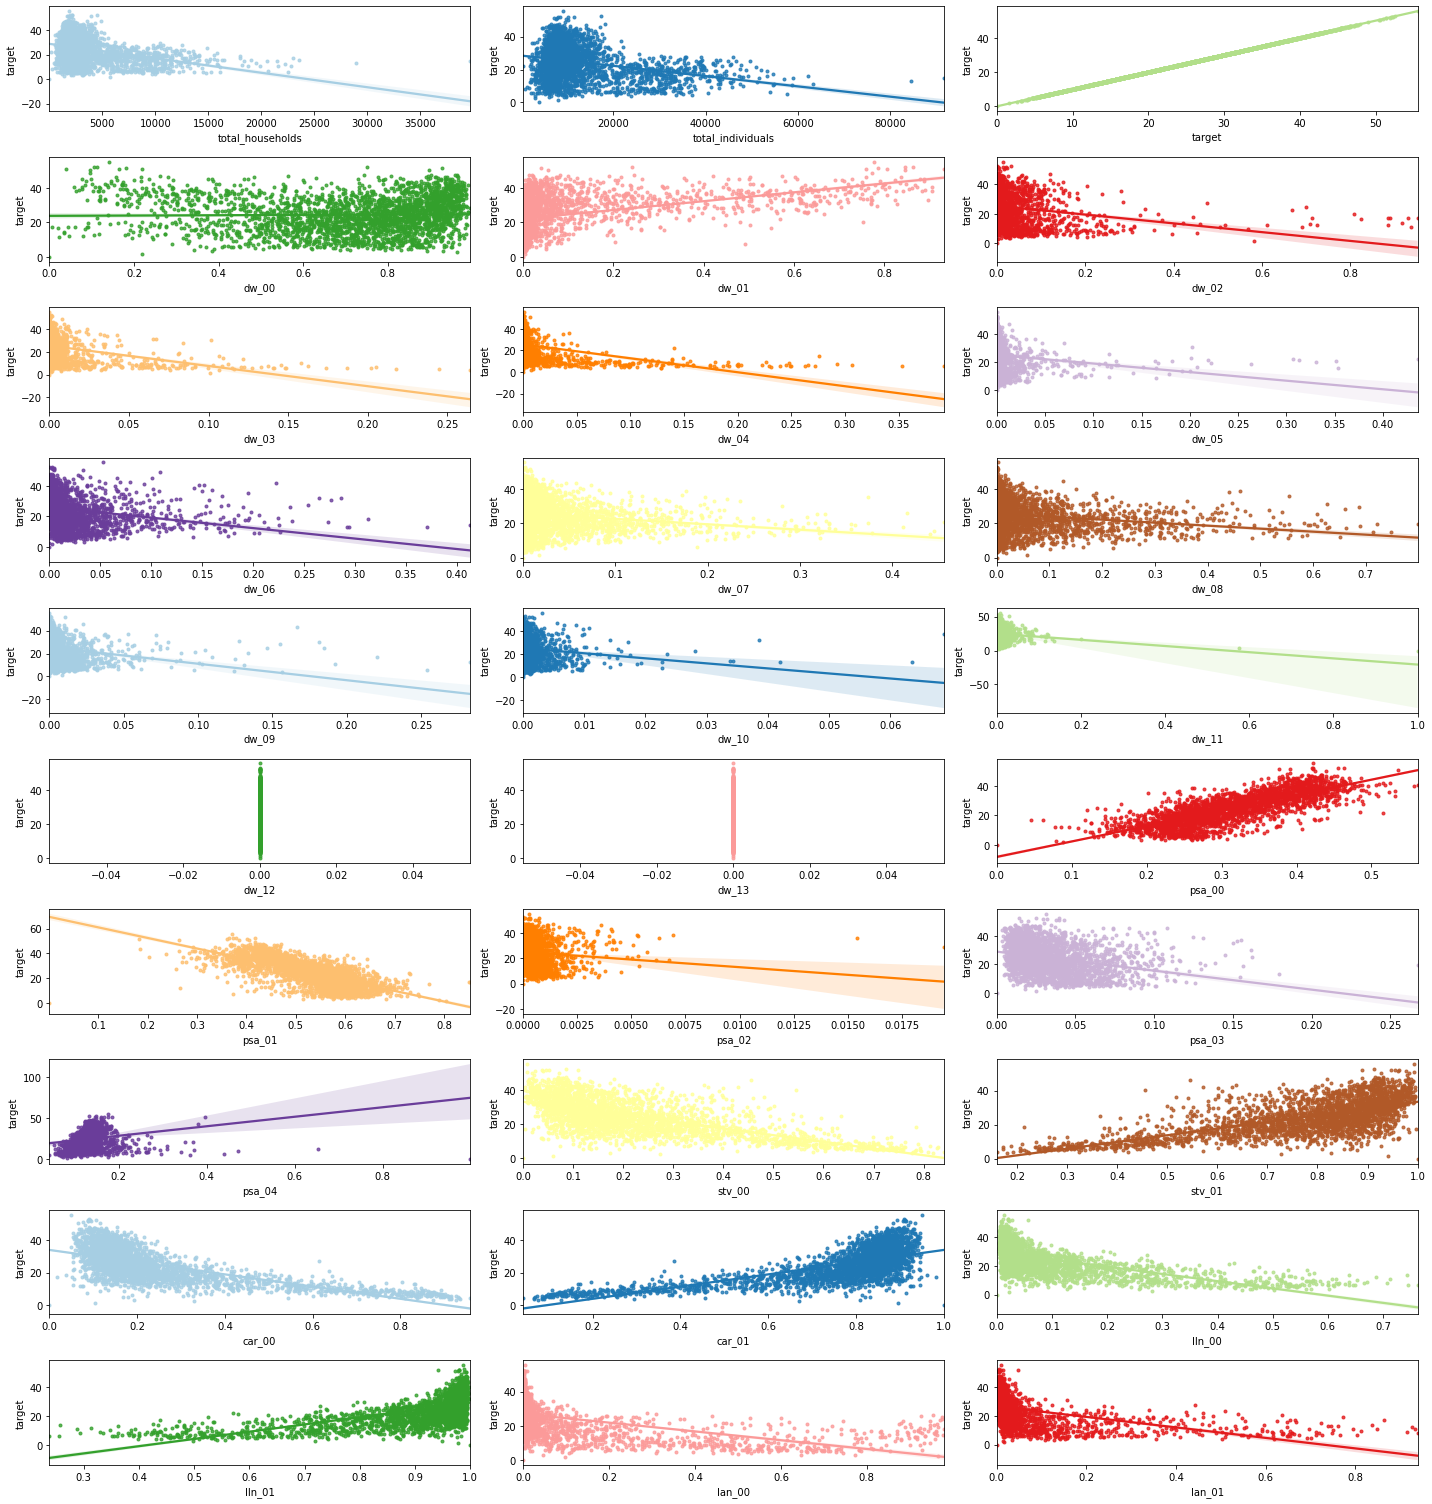

In [13]:
#For 25 int and 4 float values 10 x 3 cells are used
numRows = 10
numCols = 3
 
fig, axes = plt.subplots(numRows, numCols,figsize=(20,21))
palette= sns.color_palette("Paired", 40)

numerical_cols = df.dtypes[df.dtypes != "object"].index
listNum = list(numerical_cols)

x=-1
for num in range(0, numRows):
    for col in range(0, numCols):  
        i = num * numCols + col
        if i < len(listNum):
            x += 1
            sns.regplot(df[listNum[i]], df['target'], ax = axes[num][col],color = palette[x],marker=".")  
plt.tight_layout()    
plt.show()   

Taking a closer look at some of the features

<AxesSubplot:xlabel='car_00', ylabel='target'>

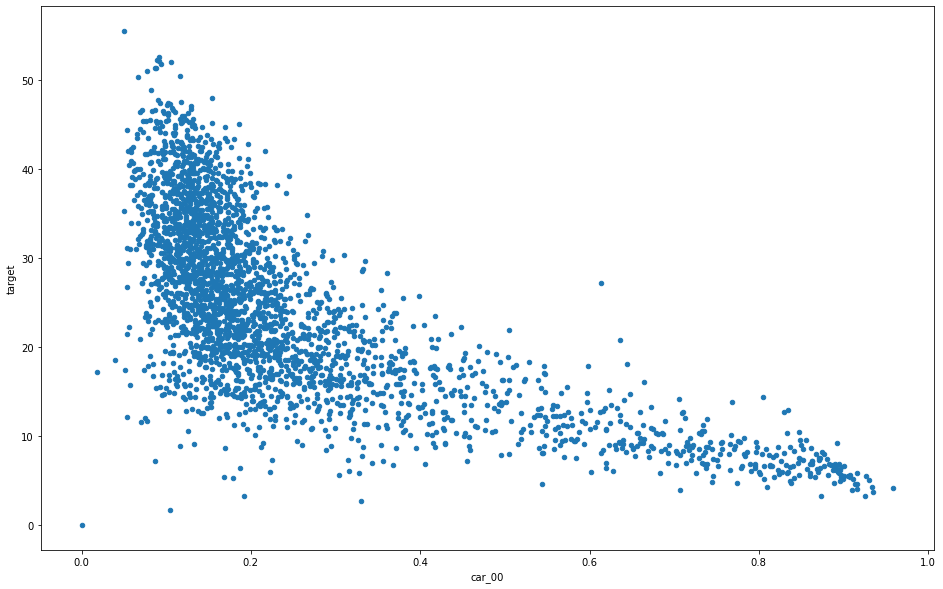

In [14]:
#considering the relationship between car owners and target feature
df.plot(x = 'car_00', y = 'target', kind = 'scatter', alpha = 1)

<AxesSubplot:xlabel='pw_00', ylabel='target'>

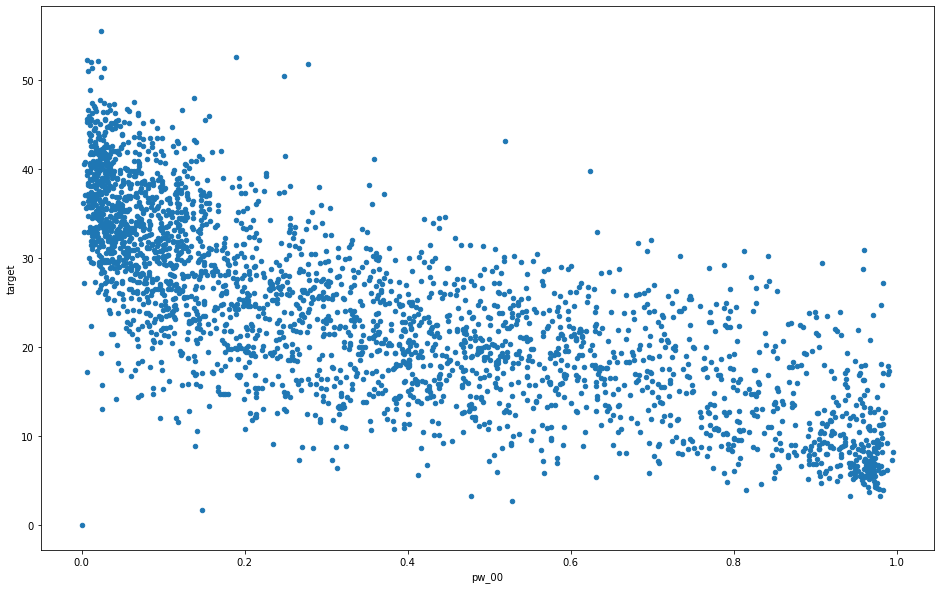

In [15]:
#Percentage with piped water access: Piped (tap) water inside dwelling/institution
df.plot(x='pw_00', y ='target', kind = 'scatter', alpha= 1)

<AxesSubplot:xlabel='pw_06', ylabel='target'>

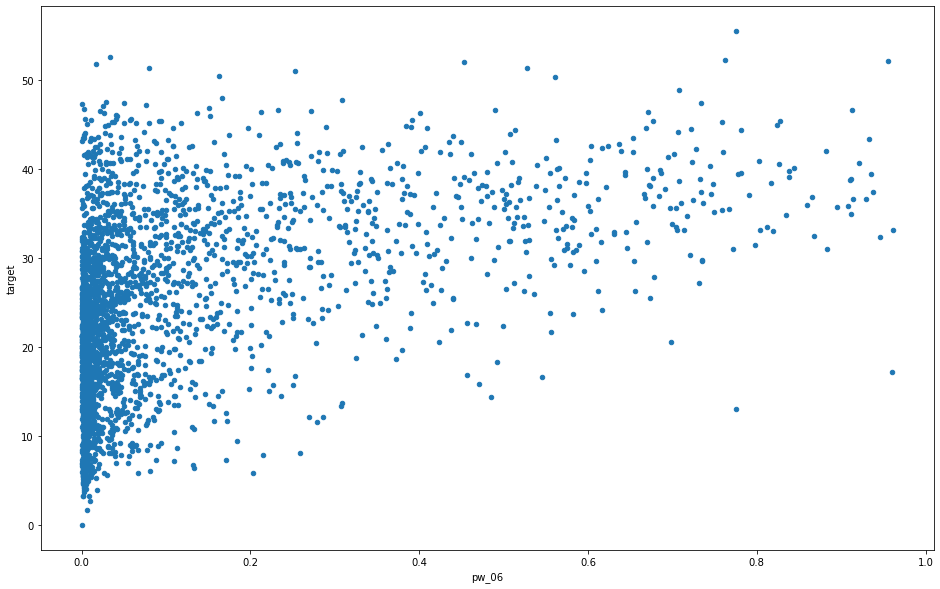

In [16]:
#no pipe water access
df.plot(x='pw_06', y='target', kind='scatter', alpha = 1)

From the few plots above the following can be deducted
1. Some features are complementary examples are: car_00/car_01,stv_00/stv_01
2. Some features have strong positive correlations with the target feature example spa_00
3. Some are of strong positive correlation
4. Some will fit in into a straight line and are choatic
5. the presece of outliers in almost all the features

In [17]:
#we drop some outliers
df = df.drop(df[(df['dw_10']>0.02)].index)
df = df.drop(df[(df['psa_02']>0.0075)].index)

<AxesSubplot:xlabel='dw_10', ylabel='target'>

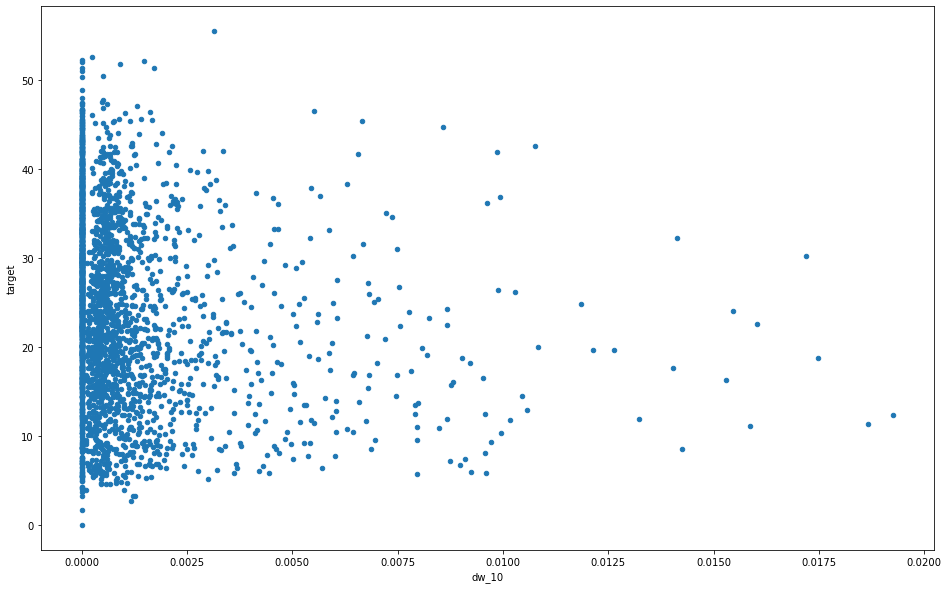

In [18]:
df.plot(x='dw_10',y='target', kind='scatter',alpha=1)

<AxesSubplot:xlabel='psa_02', ylabel='target'>

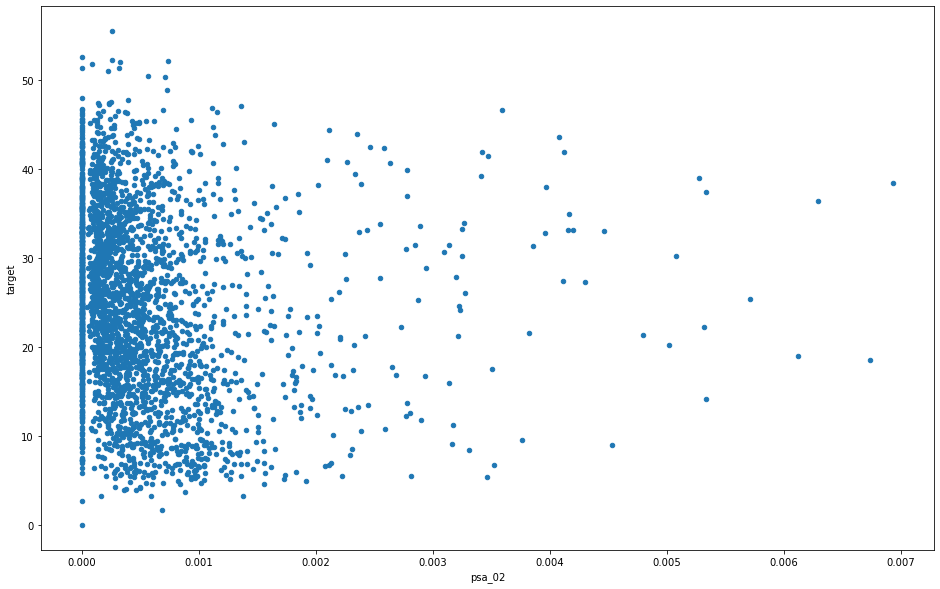

In [19]:
df.plot( x='psa_02',y='target',kind='scatter',alpha=1)

In [20]:
# Some features that are complementry will be droped
df_drop = df.copy()
df_drop = df_drop.drop(['stv_01','car_01','lln_01'],axis = 1)

In [21]:
#Being that the the aim of this analysis is to determine if there is an increase in the numbers of target feature
#Coupled with low correlation of these features with the target feature.
df_drop = df_drop.drop(['ADM4_PCODE','lat','lon'],axis = 1)

## Feature Engineering


In [22]:
# Transform into categorical type
df_drop['ward'] = df_drop['ward'].astype('category')
# Let's see how many categories are within this column
df_drop['ward'].value_counts()
#Using 

30601002: Ward 2      1
79800106: Ward 106    1
79800098: Ward 98     1
79800099: Ward 99     1
79800100: Ward 100    1
                     ..
52804009: Ward 9      1
52804010: Ward 10     1
52804011: Ward 11     1
52804012: Ward 12     1
94703031: Ward 31     1
Name: ward, Length: 2810, dtype: int64

In [23]:
# Average household size - might contain some useful information
df_drop['Household_Size'] = df_drop['total_individuals']/df_drop['total_households']

In [24]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2810 entries, 0 to 2821
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ward               2810 non-null   category
 1   total_households   2810 non-null   float64 
 2   total_individuals  2810 non-null   float64 
 3   target             2810 non-null   float64 
 4   dw_00              2810 non-null   float64 
 5   dw_01              2810 non-null   float64 
 6   dw_02              2810 non-null   float64 
 7   dw_03              2810 non-null   float64 
 8   dw_04              2810 non-null   float64 
 9   dw_05              2810 non-null   float64 
 10  dw_06              2810 non-null   float64 
 11  dw_07              2810 non-null   float64 
 12  dw_08              2810 non-null   float64 
 13  dw_09              2810 non-null   float64 
 14  dw_10              2810 non-null   float64 
 15  dw_11              2810 non-null   float64 
 16  dw_12 

In [25]:
df_drop.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,NL,Household_Size
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,0.292039,3.516501
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,3.207775,3.877587
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,0.000000,3.025929
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,2.038778,3.294194
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,0.000000,3.846971


In [26]:
# Define our input columns.
in_cols = df.drop('ADM4_PCODE', axis=1).columns[4:]
in_cols 

Index(['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04',
       'pw_05', 'pw_06', 'pw_07', 'pw_08', 'lat', 'lon', 'NL'],
      dtype='object')

In [27]:
# Specify our target variable
ycol = 'target'

In [28]:
# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[in_cols][:-1000], df[ycol][:-1000])

LinearRegression()

In [29]:
lm.score(df[in_cols][-1000:], df[ycol][-1000:]) # R2 score

-10.341802070496623

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:", sqrt(mean_squared_error(df[ycol][-1000:], lm.predict(df[in_cols][-1000:]))))

RMSE: 32.246590434981236


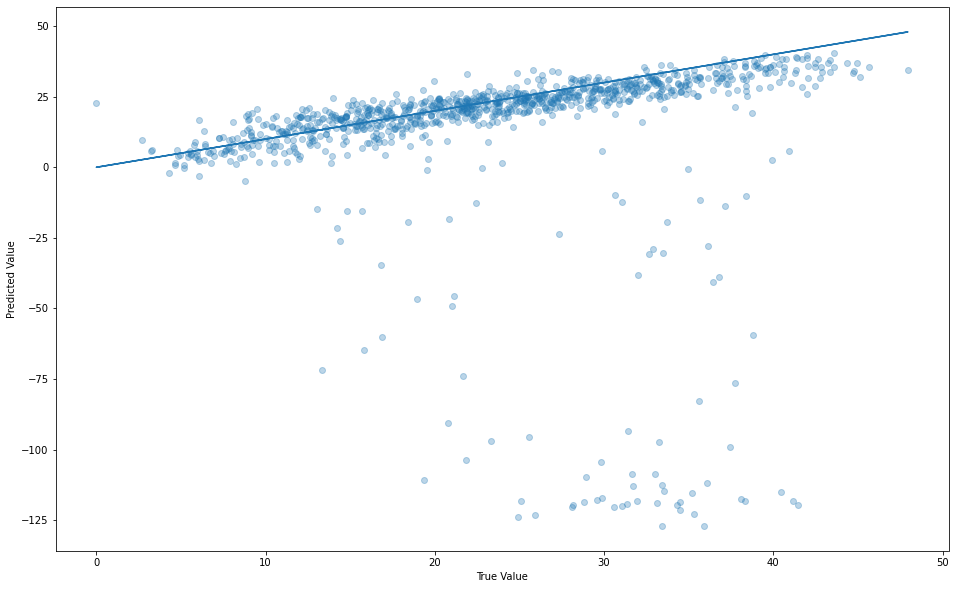

In [31]:
# Plot predicted vs actual
plt.scatter(df[ycol][-1000:], lm.predict(df[in_cols][-1000:]), alpha=0.3)
plt.plot(df[ycol][-1000:], df[ycol][-1000:]) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators=100) # My go-to quick model for regression tasks.
rf.fit(df[in_cols][:-1000], df[ycol][:-1000])

RandomForestRegressor()

In [34]:
rf.score(df[in_cols][-1000:], df[ycol][-1000:]) # Very good!

0.8111117759258483

In [35]:
print("RMSE:", sqrt(mean_squared_error(df[ycol][-1000:], rf.predict(df[in_cols][-1000:]))))

RMSE: 4.1614550824691365


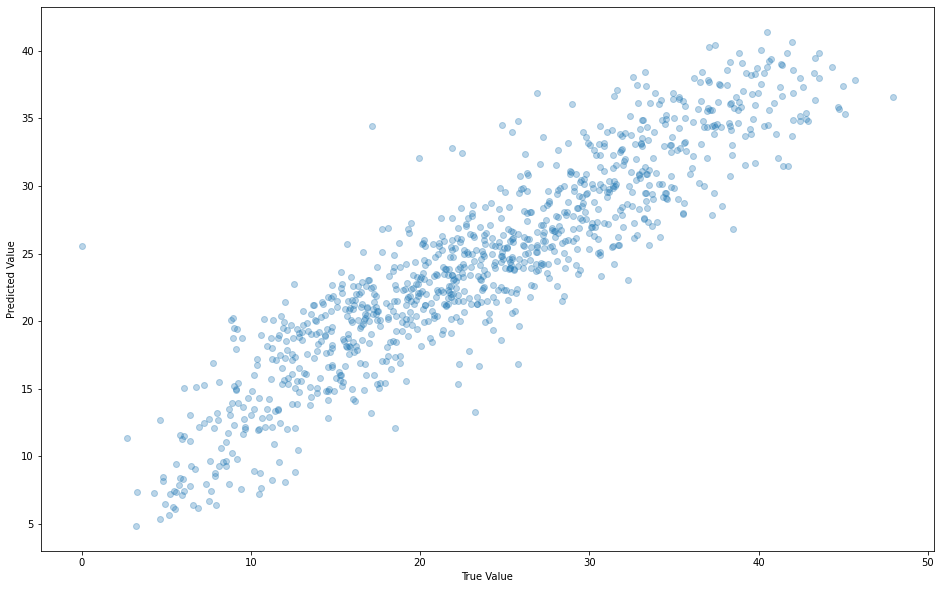

In [36]:
plt.scatter(df[ycol][-1000:], rf.predict(df[in_cols][-1000:]), alpha=0.3)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

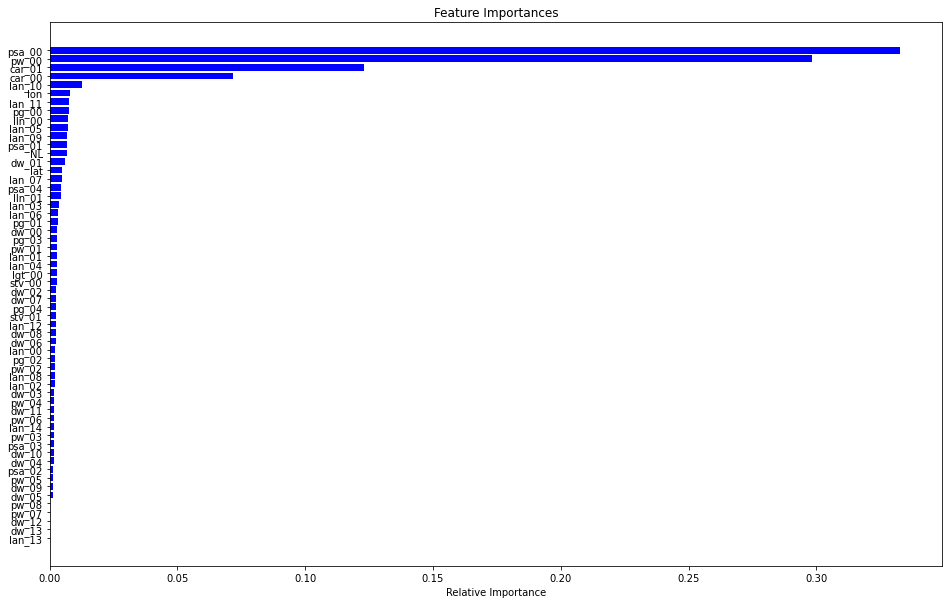

In [37]:
features = in_cols
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<AxesSubplot:xlabel='psa_00', ylabel='target'>

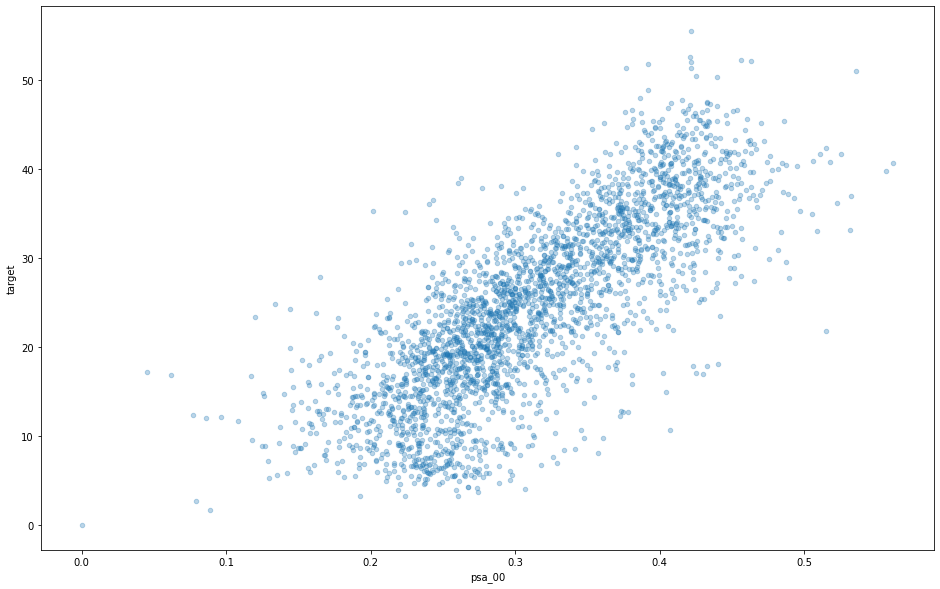

In [38]:
# It turns out school attendance is VERY informative!
df.plot(x='psa_00', y='target', kind='scatter', alpha=0.3)

Better scoring with Cross-Validation
We could start tweaking model parameters and trying different models, using the code above to get the score. But this gives a score for just one split - we could pick a worse model that just happens to do well on the last 1000 rows. instead, we'll use something called k-fold cross validation to get a better estimate of how well one model does in relation to another.

In [39]:
from sklearn.model_selection import KFold

# Demonstrating splits
kf = KFold(n_splits=5, shuffle=False)
for train, test in kf.split(df):
  print(df.iloc[train].shape, df.iloc[test].shape)

(2248, 63) (562, 63)
(2248, 63) (562, 63)
(2248, 63) (562, 63)
(2248, 63) (562, 63)
(2248, 63) (562, 63)


In [40]:
# Using this to test a model on 5 different splits
kf = KFold(n_splits=5, shuffle=False)

scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 5-fold CV:", np.mean(scores))

3.8144077360659616
3.4277630319690804
4.682796057702023
4.366229299065568
4.029479070954466
Average score in 5-fold CV: 4.064135039151419


As you can see, the scores vary depending on the split. Taking the average of 5 runs gives a much better estimate of the total. You could go higher, but 5 should be enough to see major differences.

In [41]:
kf = KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 5-fold CV:", np.mean(scores))

3.2812121349092096
3.3640391736811956
3.68065292930571
3.601041056382572
3.640387666218087
Average score in 5-fold CV: 3.5134665920993546


In [42]:
# Average household size - might contain some useful information
df['Household_Size'] = df['total_individuals']/df['total_households']

In [43]:
in_cols = df.drop('ADM4_PCODE', axis=1).columns[4:]
in_cols # Check that the new feature is included

Index(['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04',
       'pw_05', 'pw_06', 'pw_07', 'pw_08', 'lat', 'lon', 'NL',
       'Household_Size'],
      dtype='object')

In [44]:
# Test in CV
kf = KFold(n_splits=5, shuffle=False)
scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
print("Average score in 5-fold CV:", np.mean(scores))

Average score in 5-fold CV: 4.004146551831136


In [45]:
for md in [3, 4, 5, 7, 9, 12, 15]:
  scores = []
  for train, test in kf.split(df):
    rf = RandomForestRegressor(n_estimators=100, max_depth=md)
    rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
    rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
    scores.append(rmse)
  print("Average score in 5-fold CV:", np.mean(scores), "for max depth:", md)

Average score in 5-fold CV: 4.800658466899567 for max depth: 3
Average score in 5-fold CV: 4.4871839487439065 for max depth: 4
Average score in 5-fold CV: 4.289487511339649 for max depth: 5
Average score in 5-fold CV: 4.1039854570371475 for max depth: 7
Average score in 5-fold CV: 4.020269754489909 for max depth: 9
Average score in 5-fold CV: 3.9775091154271545 for max depth: 12
Average score in 5-fold CV: 3.9915053635295052 for max depth: 15


In [46]:
pd.read_csv('SampleSubmission.csv').head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


In [47]:
# Load the test data
test = pd.read_csv('Test.csv')
# Add any extra features just as we did for train
test['Household_Size'] = test['total_individuals']/test['total_households']

In [48]:
# Fit a model on the whole training set, using our best parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=15)
rf.fit(df[in_cols], df[ycol])

RandomForestRegressor(max_depth=15)

In [49]:
# Make predictions
test['target'] = rf.predict(test[in_cols])
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,Household_Size,target
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000,3.491145,19.417562
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000,3.489015,14.176721
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556,5.348808,22.273830
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625,4.725482,15.881441
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754,4.735724,22.183206


In [50]:
# Save and submit!
test[['ward', 'target']].to_csv('starter_nb_submission.csv', index=False)

Trying other method

In [51]:
# Specify our target variable
ycol = df_drop['target']
y = ycol
X = df_drop.drop('target', axis=1)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
test_ward = X_test['ward']
train_ward = X_train['ward']
X_test = X_test.drop('ward', axis = 1)
X_train = X_train.drop('ward', axis = 1)

In [54]:
#fit for linear regretion
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [55]:
y_pred =LR.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test, y_pred)

58770.53715130917

In [57]:
# The coefficients
print("Coefficients: \n", LR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [-6.06925362e-04  1.54419070e-04 -6.24189128e+07 -6.24189073e+07
 -6.24189195e+07 -6.24189145e+07 -6.24189079e+07 -6.24189097e+07
 -6.24189227e+07 -6.24189209e+07 -6.24189171e+07 -6.24189330e+07
 -6.24189910e+07 -6.24189212e+07 -2.96418553e+03 -3.28759751e+02
 -2.19389760e+07 -2.19390382e+07 -2.19390301e+07 -2.19390280e+07
 -2.19389711e+07 -1.00863931e+00 -3.75397667e+01  1.77339434e+01
  8.74549915e+06  8.74550288e+06  8.74550433e+06  8.74549843e+06
  8.74550068e+06  8.74550445e+06  8.74550433e+06  8.74550055e+06
  8.74548416e+06  8.74550082e+06  8.74550201e+06  8.74550548e+06
  8.74549837e+06 -1.59201820e+00  8.74546726e+06 -3.53867953e+07
 -3.53867943e+07 -3.53867896e+07 -3.53867838e+07 -3.53867922e+07
  4.54250097e+00 -3.78262446e+06 -3.78262174e+06 -3.78261899e+06
 -3.78261976e+06 -3.78261802e+06 -3.78261323e+06 -3.78261885e+06
  0.00000000e+00  0.00000000e+00 -7.38008320e-03 -1.92003298e+00]
Mean squared error: 58770.54
Coefficient of determination: -549.87


In [58]:
X_train

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,NL,Household_Size
756,13673.04787,34627.32567,0.429568,0.003091,0.031933,0.089650,0.392085,0.030782,0.008375,0.002737,...,0.018062,0.001538,0.001738,0.000090,0.000364,0.004030,0,0,58.260311,2.532524
2069,3547.79429,13184.54827,0.928027,0.003212,0.017788,0.003472,0.007243,0.001164,0.011885,0.013594,...,0.188840,0.002519,0.001186,0.000297,0.000595,0.002860,0,0,12.111639,3.716266
2132,2028.11032,7803.79027,0.801608,0.038948,0.005138,0.006503,0.056758,0.022682,0.014505,0.007335,...,0.210517,0.031717,0.009317,0.005026,0.002137,0.045356,0,0,29.854350,3.847814
1060,1365.84146,7234.25831,0.252390,0.691236,0.028051,0.000000,0.007186,0.001540,0.003243,0.003201,...,0.069922,0.084038,0.016530,0.014806,0.016858,0.749460,0,0,1.259464,5.296558
118,2482.92166,9272.60703,0.774420,0.072025,0.003737,0.001952,0.000000,0.000000,0.003189,0.092896,...,0.611309,0.036994,0.010306,0.001382,0.002258,0.041740,0,0,1.931018,3.734555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,4210.26257,16550.99232,0.910558,0.010364,0.020678,0.000491,0.000000,0.000269,0.023973,0.010154,...,0.413021,0.102610,0.038116,0.021646,0.004236,0.026704,0,0,21.625949,3.931107
1097,2534.33880,8821.46995,0.699295,0.046154,0.067982,0.000000,0.009959,0.002077,0.009538,0.012197,...,0.493674,0.124224,0.042523,0.002971,0.000000,0.023384,0,0,9.049260,3.480778
1132,3622.84583,15092.74170,0.843236,0.116024,0.010928,0.004012,0.002967,0.000313,0.002875,0.008504,...,0.485577,0.028097,0.005474,0.003220,0.002155,0.179551,0,0,7.544206,4.165991
1297,1533.19176,9083.65433,0.329239,0.625632,0.027059,0.000000,0.000667,0.000667,0.007855,0.002149,...,0.137154,0.122736,0.035661,0.008680,0.059859,0.572139,0,0,0.304378,5.924669


ValueError: x and y must be the same size

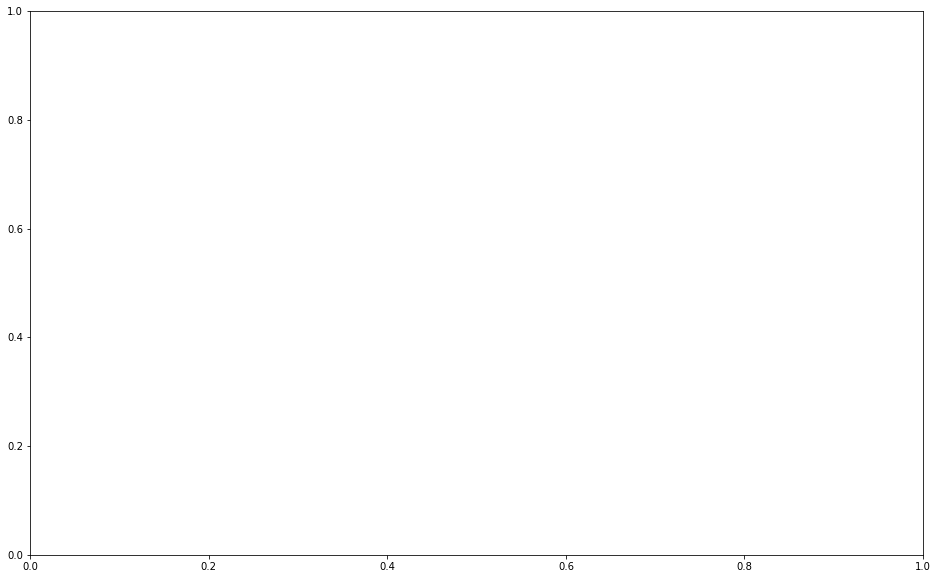

In [59]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

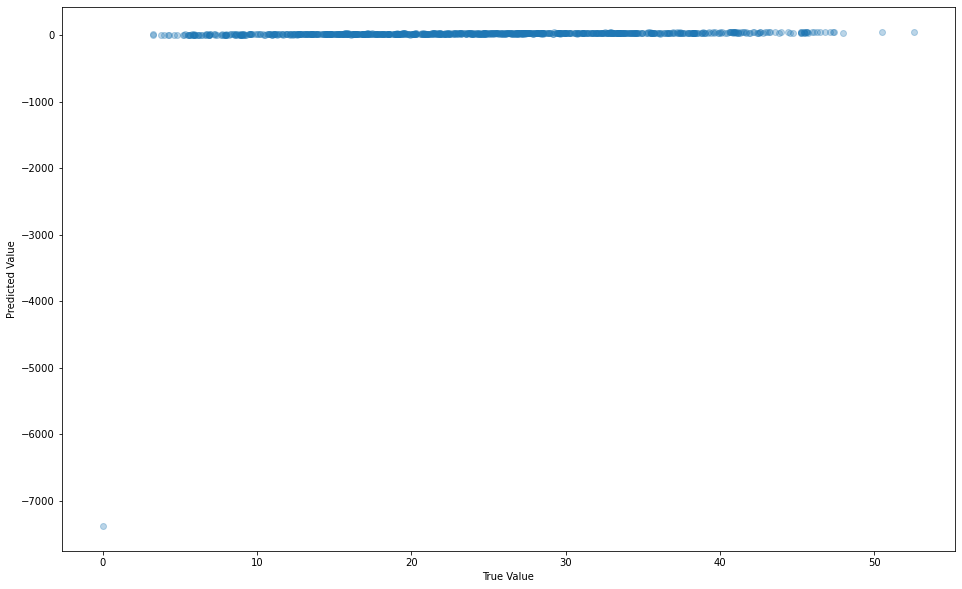

In [60]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.3)
#plt.plot(df[ycol][-1000:], df[ycol][-1000:]) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=100) # My go-to quick model for regression tasks.
rf.fit(X_train, y_train)

RandomForestRegressor()

KeyError: 37

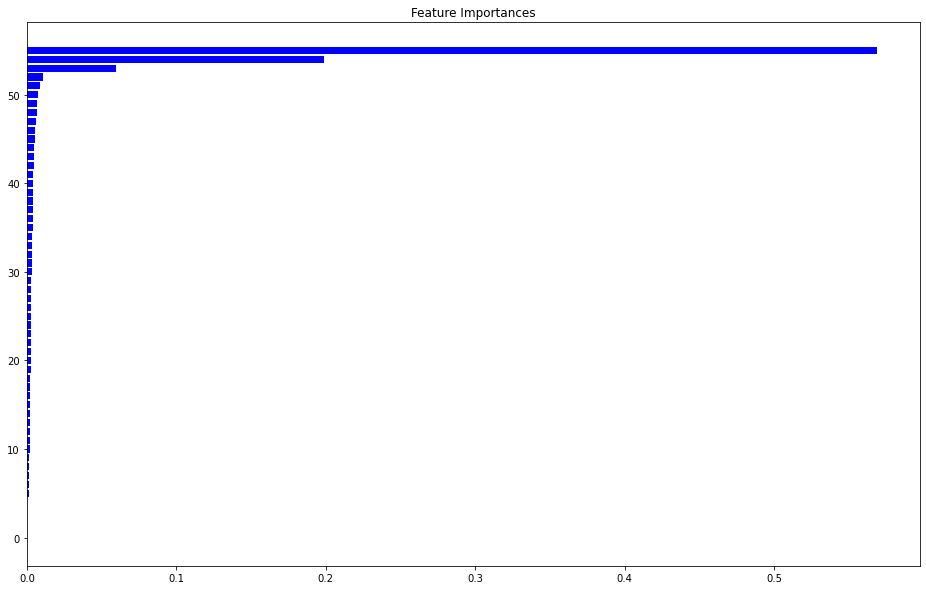

In [62]:
features = X_train
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()